In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#pip install opencv-python

In [5]:
from PIL import Image

In [6]:
#from skimage.io import imread

In [7]:
from glob import glob
files = glob("C:\\Users\\Abhishake Sing\\Desktop\\Workplace\\IDC_regular_ps50_idx5\*\*\*")
total_images = len(files)

In [8]:
total_images

81141

In [9]:
import pandas as pd
import numpy as np
import cv2
#from PIL import Image

data = pd.DataFrame(index = np.arange(0, total_images), columns = ['Patient_id', 'Path', 'Target', 'Image'])

lst = []
for i in range(len(data)):
    p_id = files[i].split("\\")[6]
    path_id = files[i]
    target = files[i].split("\\")[7]
    img = cv2.imread(files[i], cv2.IMREAD_COLOR)
    img = cv2.resize(img, (50, 50), interpolation = cv2.INTER_LINEAR)
    #img = img/255.0
    
    #img = Image.open(files[i])
    #img = img.convert('RGB')
    
    lst.append([p_id, path_id, target, img])
    


data = pd.DataFrame(lst, columns = ['Patient_id', 'Path', 'Target', 'Image'])
data

Patient_id                                               Path Target  \
0           8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      0   
1           8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      0   
2           8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      0   
3           8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      0   
4           8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      0   
...          ...                                                ...    ...   
81136       9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      1   
81137       9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      1   
81138       9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      1   
81139       9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      1   
81140       9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...      1   

                                                   Image  
0      [[[158, 110, 162], [160, 117, 151], [137, 99, ...  
1      [[[120, 70, 129], [147, 103, 180], [149, 100, ...  
2      [[[179, 148, 216], [215, 194, 227], [134, 95, ...  
3      [[[243, 239, 244], [240, 240, 239], [242, 232,...  
4      [[[207, 185, 212], [191, 168, 218], [144, 104,...  
...                                                  ...  
81136  [[[172, 139, 186], [143, 92, 139], [123, 71, 1...  
81137  [[[120, 70, 115], [153, 111, 153], [156, 119, ...  
81138  [[[128, 84, 130], [159, 121, 175], [161, 120, ...  
81139  [[[153, 107, 176], [155, 112, 178], [148, 105,...  
81140  [[[238, 235, 240], [238, 233, 237], [221, 218,...  

[81141 rows x 4 columns]

In [10]:
#data

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81141 entries, 0 to 81140
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_id  81141 non-null  object
 1   Path        81141 non-null  object
 2   Target      81141 non-null  object
 3   Image       81141 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [12]:
data['Target'] = data['Target'].astype(int)
data['Patient_id'] = data['Patient_id'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81141 entries, 0 to 81140
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_id  81141 non-null  int32 
 1   Path        81141 non-null  object
 2   Target      81141 non-null  int32 
 3   Image       81141 non-null  object
dtypes: int32(2), object(2)
memory usage: 1.9+ MB


In [14]:
data.shape

(81141, 4)

In [15]:
data['Target'].value_counts()

0    62177
1    18964
Name: Target, dtype: int64

In [16]:
pos_idc = data.loc[data['Target'] == 0, ['Patient_id', 'Path', 'Target', 'Image']]
pos_idc.reset_index(drop=True, inplace=True)
pos_idc

Patient_id                                               Path  Target  \
0            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
1            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
2            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
3            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
4            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
...           ...                                                ...     ...   
62172        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62173        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62174        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62175        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62176        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   

                                                   Image  
0      [[[158, 110, 162], [160, 117, 151], [137, 99, ...  
1      [[[120, 70, 129], [147, 103, 180], [149, 100, ...  
2      [[[179, 148, 216], [215, 194, 227], [134, 95, ...  
3      [[[243, 239, 244], [240, 240, 239], [242, 232,...  
4      [[[207, 185, 212], [191, 168, 218], [144, 104,...  
...                                                  ...  
62172  [[[244, 239, 242], [220, 209, 233], [223, 212,...  
62173  [[[210, 193, 234], [217, 205, 234], [202, 184,...  
62174  [[[242, 241, 242], [240, 239, 242], [241, 240,...  
62175  [[[236, 233, 240], [234, 233, 237], [238, 236,...  
62176  [[[196, 176, 228], [178, 158, 217], [130, 101,...  

[62177 rows x 4 columns]

In [17]:
neg_idc = data.loc[data['Target'] == 1, ['Patient_id', 'Path', 'Target', 'Image']]
neg_idc.reset_index(drop=True, inplace=True)
neg_idc

Patient_id                                               Path  Target  \
0            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
1            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
2            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
3            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
4            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
...           ...                                                ...     ...   
18959        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18960        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18961        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18962        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18963        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   

                                                   Image  
0      [[[148, 99, 160], [116, 61, 103], [114, 52, 99...  
1      [[[138, 94, 163], [146, 98, 151], [155, 107, 1...  
2      [[[133, 83, 125], [143, 96, 144], [122, 71, 11...  
3      [[[135, 101, 209], [142, 99, 206], [142, 103, ...  
4      [[[152, 114, 194], [124, 84, 201], [118, 84, 2...  
...                                                  ...  
18959  [[[172, 139, 186], [143, 92, 139], [123, 71, 1...  
18960  [[[120, 70, 115], [153, 111, 153], [156, 119, ...  
18961  [[[128, 84, 130], [159, 121, 175], [161, 120, ...  
18962  [[[153, 107, 176], [155, 112, 178], [148, 105,...  
18963  [[[238, 235, 240], [238, 233, 237], [221, 218,...  

[18964 rows x 4 columns]

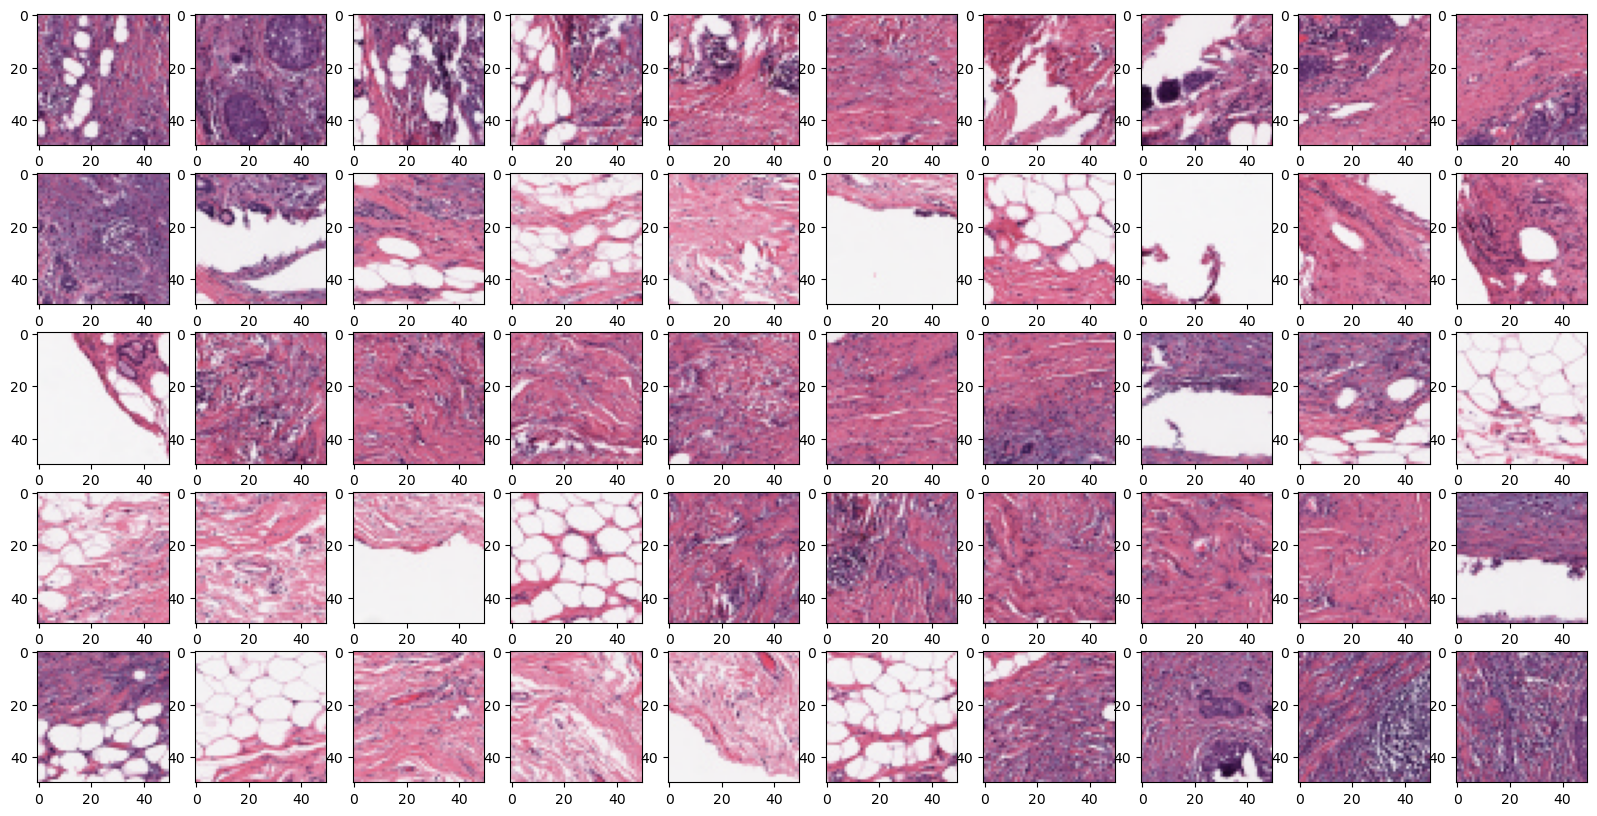

In [90]:
import matplotlib.pyplot as plt
#from skimage.io import imread
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = pos_idc.index[m + 10*n]
        image = Image.open(pos_idc.loc[idx, "Path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

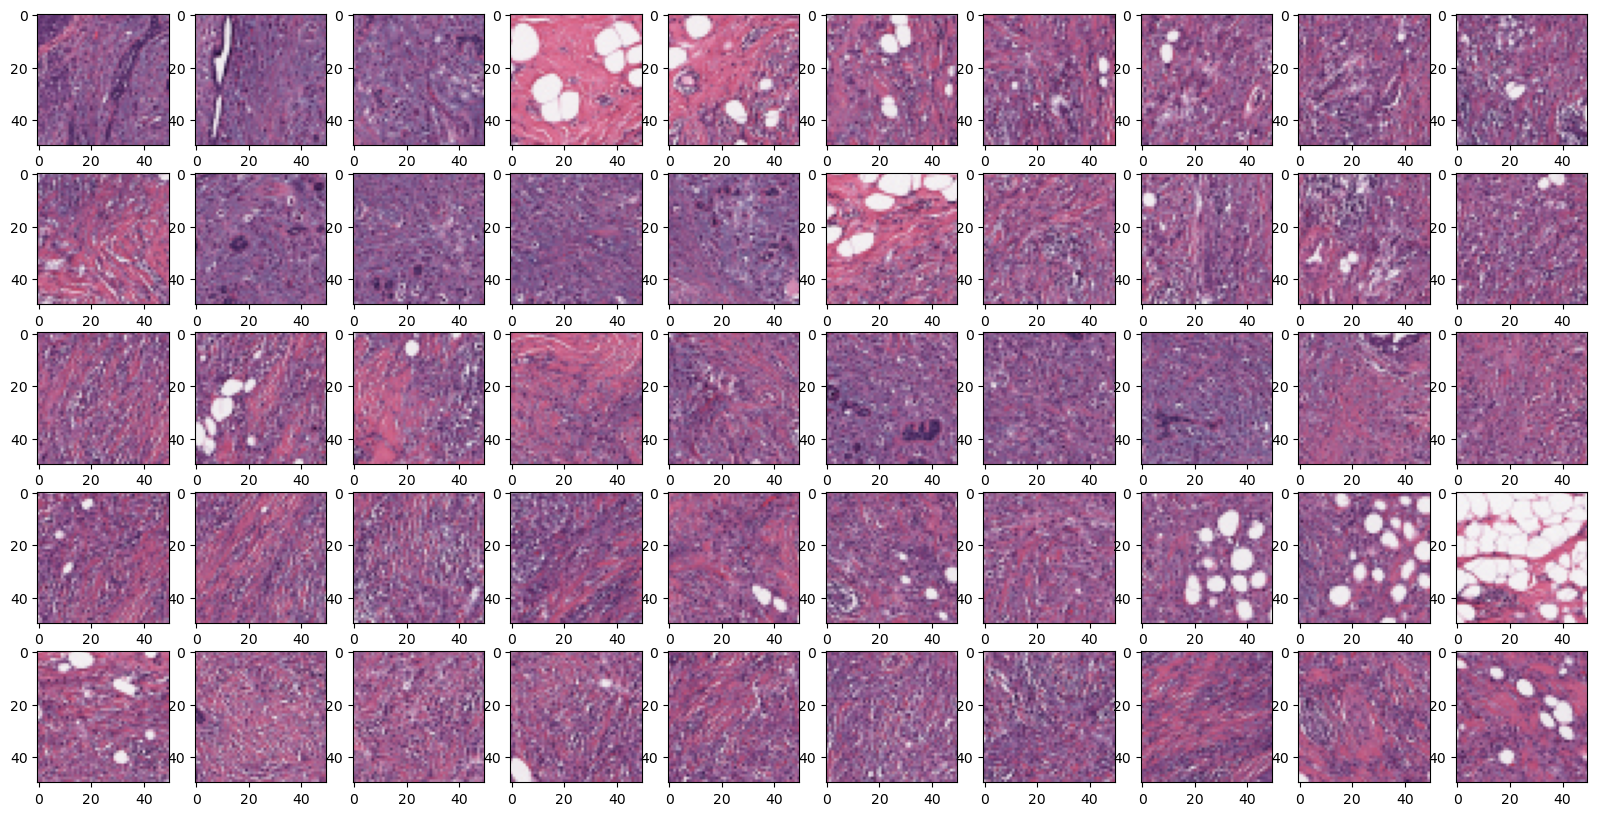

In [91]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = neg_idc.index[m + 10*n]
        image = Image.open(neg_idc.loc[idx, "Path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [18]:
axis = data.Path.str.rsplit("_", n=4, expand=True)
axis = axis.drop([0, 1, 4], axis=1)
axis = axis.rename({2: "X", 3: "Y"}, axis=1)
axis.loc[:, "X"] = axis.loc[:,"X"].str.replace("x", "", case=False).astype(int)
axis.loc[:, "Y"] = axis.loc[:,"Y"].str.replace("y", "", case=False).astype(int)

In [19]:
data.loc[:, "X"] = axis.X.values
data.loc[:, "Y"] = axis.Y.values

In [20]:
data

Patient_id                                               Path  Target  \
0            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
1            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
2            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
3            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
4            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
...           ...                                                ...     ...   
81136        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81137        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81138        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81139        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81140        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   

                                                   Image     X     Y  
0      [[[158, 110, 162], [160, 117, 151], [137, 99, ...  1001  1001  
1      [[[120, 70, 129], [147, 103, 180], [149, 100, ...  1001  1051  
2      [[[179, 148, 216], [215, 194, 227], [134, 95, ...  1001  1101  
3      [[[243, 239, 244], [240, 240, 239], [242, 232,...  1001  1151  
4      [[[207, 185, 212], [191, 168, 218], [144, 104,...  1001  1201  
...                                                  ...   ...   ...  
81136  [[[172, 139, 186], [143, 92, 139], [123, 71, 1...  2051   901  
81137  [[[120, 70, 115], [153, 111, 153], [156, 119, ...  2051   951  
81138  [[[128, 84, 130], [159, 121, 175], [161, 120, ...  2101  1001  
81139  [[[153, 107, 176], [155, 112, 178], [148, 105,...  2101   901  
81140  [[[238, 235, 240], [238, 233, 237], [221, 218,...  2101   951  

[81141 rows x 6 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81141 entries, 0 to 81140
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Patient_id  81141 non-null  int32 
 1   Path        81141 non-null  object
 2   Target      81141 non-null  int32 
 3   Image       81141 non-null  object
 4   X           81141 non-null  int32 
 5   Y           81141 non-null  int32 
dtypes: int32(4), object(2)
memory usage: 2.5+ MB


In [48]:
#data.to_csv('breast_df_norm_50x50.csv')

In [50]:
data = pd.read_csv('breast_df_50x50.csv')
data

Unnamed: 0  Patient_id  \
0               0        8863   
1               1        8863   
2               2        8863   
3               3        8863   
4               4        8863   
...           ...         ...   
81136       81136        9383   
81137       81137        9383   
81138       81138        9383   
81139       81139        9383   
81140       81140        9383   

                                                    Path  Target  \
0      C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
1      C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
2      C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
3      C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
4      C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
...                                                  ...     ...   
81136  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81137  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81138  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81139  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
81140  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   

                                                   Image     X     Y  
0      [[[158 110 162]\n  [160 117 151]\n  [137  99 1...  1001  1001  
1      [[[120  70 129]\n  [147 103 180]\n  [149 100 1...  1001  1051  
2      [[[179 148 216]\n  [215 194 227]\n  [134  95 2...  1001  1101  
3      [[[243 239 244]\n  [240 240 239]\n  [242 232 2...  1001  1151  
4      [[[207 185 212]\n  [191 168 218]\n  [144 104 2...  1001  1201  
...                                                  ...   ...   ...  
81136  [[[172 139 186]\n  [143  92 139]\n  [123  71 1...  2051   901  
81137  [[[120  70 115]\n  [153 111 153]\n  [156 119 1...  2051   951  
81138  [[[128  84 130]\n  [159 121 175]\n  [161 120 1...  2101  1001  
81139  [[[153 107 176]\n  [155 112 178]\n  [148 105 1...  2101   901  
81140  [[[238 235 240]\n  [238 233 237]\n  [221 218 2...  2101   951  

[81141 rows x 7 columns]

In [92]:
def patient_dataframe(patient_id):
    df = data.loc[(data["Patient_id"] == patient_id)]
    #df_1 = data.loc[(data["Patient_id"] == patient_id) & (data['Target'] == 1)]
    #patient_df = df_0.append(df_1)
    return df

In [93]:
patient_dataframe(8864)

Unnamed: 0  Patient_id  \
979          979        8864   
980          980        8864   
981          981        8864   
982          982        8864   
983          983        8864   
...          ...         ...   
2107        2107        8864   
2108        2108        8864   
2109        2109        8864   
2110        2110        8864   
2111        2111        8864   

                                                   Path  Target  \
979   C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
980   C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
981   C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
982   C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
983   C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
...                                                 ...     ...   
2107  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
2108  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
2109  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
2110  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
2111  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   

                                                  Image     X     Y  
979   [[[224 215 228]\n  [233 230 238]\n  [241 241 2...  1001  1501  
980   [[[240 241 242]\n  [240 239 241]\n  [240 239 2...  1001  1551  
981   [[[240 241 242]\n  [241 235 242]\n  [242 240 2...  1001  1651  
982   [[[235 229 236]\n  [242 243 241]\n  [233 222 2...  1001  2001  
983   [[[240 241 240]\n  [240 239 242]\n  [240 238 2...  1001  2201  
...                                                 ...   ...   ...  
2107  [[[235 233 238]\n  [234 233 238]\n  [234 227 2...  2501  2551  
2108  [[[ 90  36  71]\n  [ 65  23  46]\n  [ 78  30  ...  2501  2601  
2109  [[[123  77 116]\n  [158 112 166]\n  [122  76 1...  2501  2651  
2110  [[[234 231 235]\n  [167 136 158]\n  [225 216 2...  2501  2701  
2111  [[[223 222 230]\n  [234 230 236]\n  [234 234 2...  2501  2751  

[1133 rows x 7 columns]

In [94]:
def scatter_plot(patient_id):
    
    example_df = patient_dataframe(patient_id)

    plt.scatter(example_df.X.values, example_df.Y.values, c = example_df.Target.values, cmap = "coolwarm", s = 20)
    plt.title("Patient : " + str(patient_id))
    plt.xlabel("y coord")
    plt.ylabel("x coord")
    
    return plt.show()

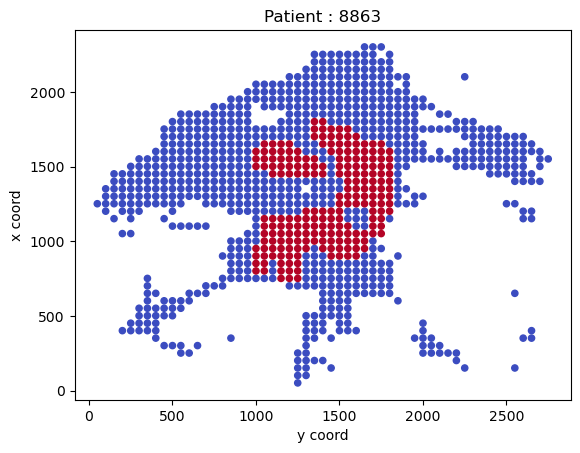

In [95]:
scatter_plot(8863) 

In [98]:
def image_plot(patient_id):
    example_df = patient_dataframe(patient_id)
    
    max_point = [example_df.Y.max()-1, example_df.X.max()-1]
    shape_3 = (max_point[0] + 50, max_point[1] + 50, 3)
    grid = 255*np.ones(shape_3).astype(int)
    mask = 255*np.ones(shape_3).astype(int)
    
    shape_1 = (max_point[0] + 50, max_point[1] + 50, 1)
    mask_proba = np.zeros(shape_1).astype(float)
    
    broken_patches = []

    for n in range(len(example_df)):
        try:
            image = Image.open(example_df.Path.values[n])
            
            target = example_df.Target.values[n]
            
            x_coord = np.int(example_df.X.values[n])
            y_coord = np.int(example_df.Y.values[n])
            x_start = x_coord - 1
            y_start = y_coord - 1
            x_end = x_start + 50
            y_end = y_start + 50
            grid[y_start:y_end, x_start:x_end] = image
            if target == 1:
                mask[y_start:y_end, x_start:x_end, 0] = 250
                mask[y_start:y_end, x_start:x_end, 1] = 0
                mask[y_start:y_end, x_start:x_end, 2] = 0
        except ValueError:
            broken_patches.append(example_df.Path.values[n])
    
    fig, ax = plt.subplots(1,2,figsize=(20,10))
    ax[0].imshow(grid, alpha=0.9)
    ax[1].imshow(mask, alpha=0.8)
    ax[1].imshow(grid, alpha=0.7)
    ax[0].grid(False)
    ax[1].grid(False)
    for m in range(2):
        ax[m].set_xlabel("X-coord")
        ax[m].set_ylabel("Y-coord")
    ax[0].set_title("Breast tissue slice of patient : " + str(patient_id))
    ax[1].set_title("Cancer tissue colored red of patient : " + str(patient_id))
    
    return plt.show()
    

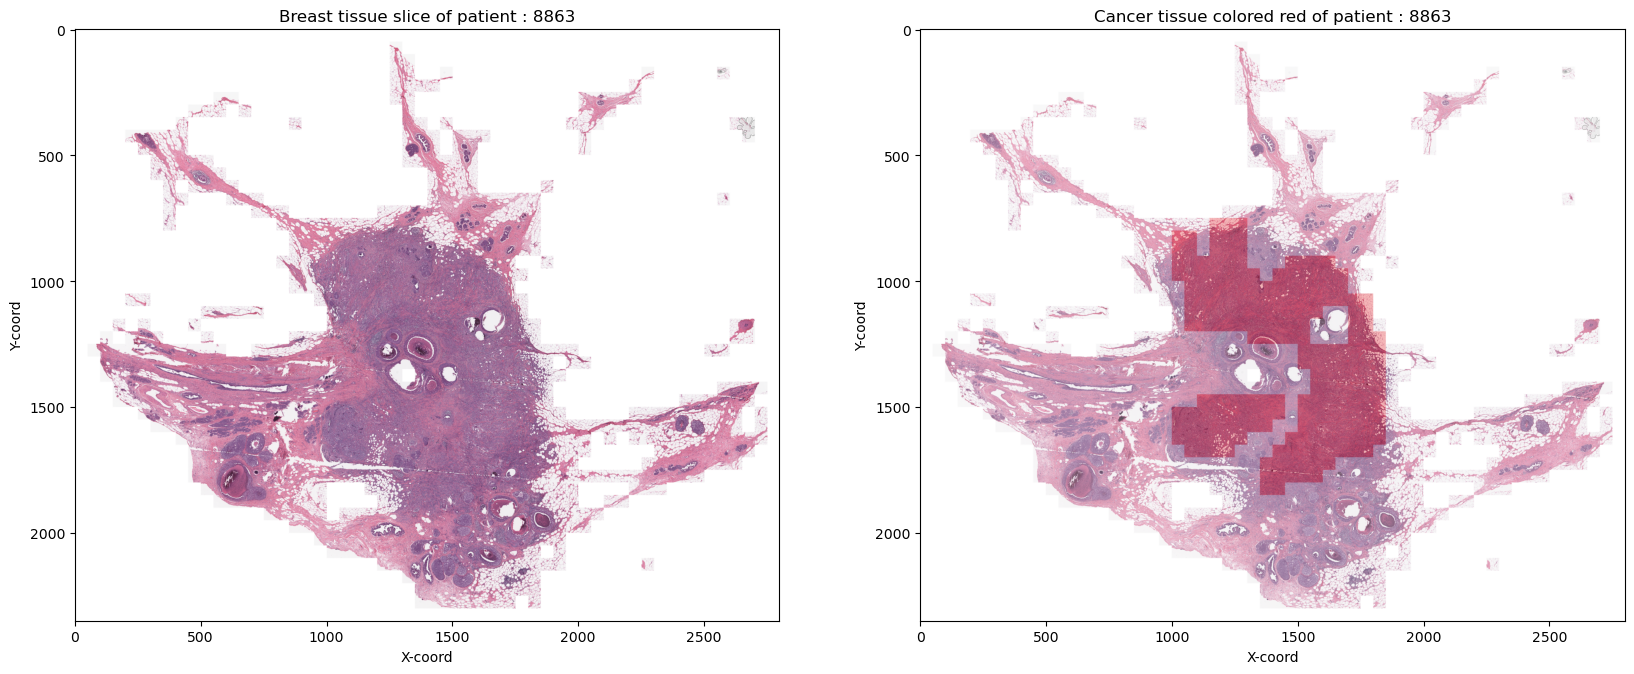

In [99]:
image_plot(8863)

In [322]:
#img = imread(data.Path[0])
#i = np.reshape(img, (50 * 50 * 3))
#i_ = pd.DataFrame(i)
#img = i_.T  
#img

In [22]:
pos_idc

Patient_id                                               Path  Target  \
0            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
1            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
2            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
3            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
4            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
...           ...                                                ...     ...   
62172        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62173        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62174        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62175        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   
62176        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       0   

                                                   Image  
0      [[[158, 110, 162], [160, 117, 151], [137, 99, ...  
1      [[[120, 70, 129], [147, 103, 180], [149, 100, ...  
2      [[[179, 148, 216], [215, 194, 227], [134, 95, ...  
3      [[[243, 239, 244], [240, 240, 239], [242, 232,...  
4      [[[207, 185, 212], [191, 168, 218], [144, 104,...  
...                                                  ...  
62172  [[[244, 239, 242], [220, 209, 233], [223, 212,...  
62173  [[[210, 193, 234], [217, 205, 234], [202, 184,...  
62174  [[[242, 241, 242], [240, 239, 242], [241, 240,...  
62175  [[[236, 233, 240], [234, 233, 237], [238, 236,...  
62176  [[[196, 176, 228], [178, 158, 217], [130, 101,...  

[62177 rows x 4 columns]

In [23]:
neg_idc

Patient_id                                               Path  Target  \
0            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
1            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
2            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
3            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
4            8863  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
...           ...                                                ...     ...   
18959        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18960        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18961        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18962        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   
18963        9383  C:\Users\Abhishake Sing\Desktop\Workplace\IDC_...       1   

                                                   Image  
0      [[[148, 99, 160], [116, 61, 103], [114, 52, 99...  
1      [[[138, 94, 163], [146, 98, 151], [155, 107, 1...  
2      [[[133, 83, 125], [143, 96, 144], [122, 71, 11...  
3      [[[135, 101, 209], [142, 99, 206], [142, 103, ...  
4      [[[152, 114, 194], [124, 84, 201], [118, 84, 2...  
...                                                  ...  
18959  [[[172, 139, 186], [143, 92, 139], [123, 71, 1...  
18960  [[[120, 70, 115], [153, 111, 153], [156, 119, ...  
18961  [[[128, 84, 130], [159, 121, 175], [161, 120, ...  
18962  [[[153, 107, 176], [155, 112, 178], [148, 105,...  
18963  [[[238, 235, 240], [238, 233, 237], [221, 218,...  

[18964 rows x 4 columns]

In [24]:
pos_idc1 = pos_idc.drop(['Patient_id','Path'], axis = 1)
neg_idc1 = neg_idc.drop(['Patient_id','Path'], axis = 1)

In [25]:
pos_idc_new = pos_idc1.sample(n = len(neg_idc1))
neg_idc_new = neg_idc1.sample(n = len(neg_idc1))

In [26]:
breast_img_arr = pd.concat([pos_idc_new, neg_idc_new])

In [27]:
breast_img_arr.reset_index(drop = True, inplace = True)
breast_img_arr

Target                                              Image
0           0  [[[243, 241, 240], [243, 239, 244], [241, 238,...
1           0  [[[133, 93, 197], [133, 94, 203], [118, 78, 19...
2           0  [[[236, 236, 240], [234, 233, 237], [221, 209,...
3           0  [[[223, 215, 232], [208, 190, 214], [236, 230,...
4           0  [[[200, 183, 228], [183, 147, 218], [171, 147,...
...       ...                                                ...
37923       1  [[[132, 82, 119], [164, 124, 167], [195, 163, ...
37924       1  [[[153, 119, 229], [152, 124, 230], [172, 144,...
37925       1  [[[150, 105, 172], [151, 107, 184], [136, 93, ...
37926       1  [[[166, 119, 168], [182, 149, 174], [184, 147,...
37927       1  [[[240, 239, 243], [242, 234, 238], [239, 240,...

[37928 rows x 2 columns]

In [28]:
breast_img_arr.Image[0].shape

(50, 50, 3)

In [29]:
def describeData(a):
    print('Total number of images: ',len(a))
    print('Number of IDC(-) Images: ',np.sum(a['Target'] == 0))
    print('Number of IDC(+) Images: ',np.sum(a['Target'] == 1))
    print('Image shape (Width, Height, Channels): ',a.Image[0].shape)

In [30]:
describeData(pos_idc1)

Total number of images:  62177
Number of IDC(-) Images:  62177
Number of IDC(+) Images:  0
Image shape (Width, Height, Channels):  (50, 50, 3)


In [31]:
describeData(neg_idc1)

Total number of images:  18964
Number of IDC(-) Images:  0
Number of IDC(+) Images:  18964
Image shape (Width, Height, Channels):  (50, 50, 3)


In [32]:
describeData(breast_img_arr)

Total number of images:  37928
Number of IDC(-) Images:  18964
Number of IDC(+) Images:  18964
Image shape (Width, Height, Channels):  (50, 50, 3)


In [33]:
x = breast_img_arr['Image'].tolist()
y = breast_img_arr['Target'].tolist()

In [34]:
x_ = np.array(x)
y_ = np.array(y)

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_, y_, test_size = 0.3)

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 2)
y_test = to_categorical(y_test, num_classes = 2)

### 75x75 

In [266]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_mod = VGG16(weights = 'imagenet', include_top = False, input_shape=(75, 75,3))
base_mod.trainable = False

# add custom top layers
x = base_mod.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(5000, activation = "relu")(x)
x = Dense(5000, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(3000, activation = "relu")(x)

predictions = Dense(2, activation = 'sigmoid')(x)
mod1 = Model(inputs = base_mod.input, outputs = predictions)

# confirm unfrozen layers
for layer in mod1.layers:
    if layer.trainable == True:
        print(layer)

In [267]:
from keras.optimizers import adam_v2
ely_stop = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1),
             ModelCheckpoint('mod1_75x75.hdf5', save_best_only = True)]
opt = adam_v2.Adam(learning_rate = 0.001)
mod1.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [271]:
%%time
hist1 = mod1.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 30, callbacks = ely_stop)

Epoch 1/30
830/830 [==============================] - 538s 646ms/step - loss: 0.5110 - accuracy: 0.7874 - val_loss: 0.4283 - val_accuracy: 0.8123
Epoch 2/30
830/830 [==============================] - 513s 618ms/step - loss: 0.4397 - accuracy: 0.8073 - val_loss: 0.4594 - val_accuracy: 0.8147
Epoch 3/30
830/830 [==============================] - 503s 606ms/step - loss: 0.4289 - accuracy: 0.8120 - val_loss: 0.4450 - val_accuracy: 0.7938
Epoch 4/30
830/830 [==============================] - 532s 641ms/step - loss: 0.4194 - accuracy: 0.8171 - val_loss: 0.4233 - val_accuracy: 0.8147
Epoch 5/30
830/830 [==============================] - 528s 636ms/step - loss: 0.4123 - accuracy: 0.8197 - val_loss: 0.4072 - val_accuracy: 0.8189
Epoch 6/30
830/830 [==============================] - 514s 619ms/step - loss: 0.4128 - accuracy: 0.8229 - val_loss: 0.4074 - val_accuracy: 0.8212
Epoch 7/30
830/830 [==============================] - 518s 624ms/step - loss: 0.4045 - accuracy: 0.8251 - val_loss: 0.4155 -

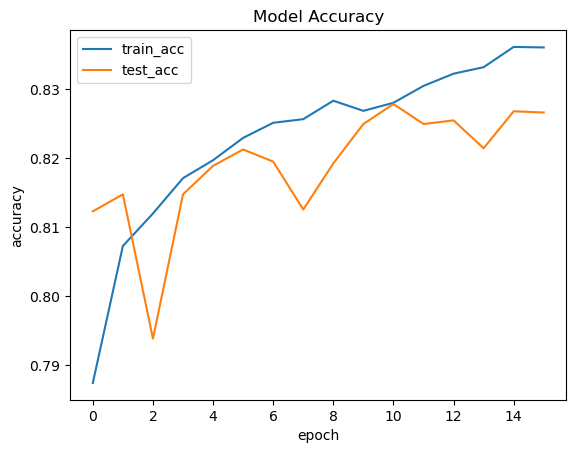

In [272]:
#plt.figure(figsize = (12,12))
#plt.subplot(2,1,1)
plt.plot(hist1.history['accuracy'], label="train_acc")
plt.plot(hist1.history['val_accuracy'], label = "test_acc")
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [282]:
from tensorflow.keras.applications import MobileNet

base_mod2 = MobileNet(weights = 'imagenet', include_top = False, input_shape=(75, 75,3))
base_mod2.trainable = False

# add custom top layers
x = base_mod2.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(2096, activation = "relu")(x)

predictions = Dense(2, activation = 'sigmoid')(x)
mod2 = Model(inputs = base_mod2.input, outputs = predictions)

# confirm unfrozen layers
for layer in mod2.layers:
    if layer.trainable == True:
        print(layer)

In [283]:
e_stop = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1),
             ModelCheckpoint('mod2_75x75.hdf5', save_best_only = True)]
opt = adam_v2.Adam(learning_rate = 0.001)
mod2.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [284]:
%%time
hist2 = mod2.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 30, callbacks = e_stop)

Epoch 1/30
830/830 [==============================] - 276s 329ms/step - loss: 0.4948 - accuracy: 0.7903 - val_loss: 0.4778 - val_accuracy: 0.8210
Epoch 2/30
830/830 [==============================] - 277s 334ms/step - loss: 0.4246 - accuracy: 0.8166 - val_loss: 0.4280 - val_accuracy: 0.8212
Epoch 3/30
830/830 [==============================] - 267s 321ms/step - loss: 0.3993 - accuracy: 0.8299 - val_loss: 0.4301 - val_accuracy: 0.8211
Epoch 4/30
830/830 [==============================] - 266s 320ms/step - loss: 0.3690 - accuracy: 0.8418 - val_loss: 0.4406 - val_accuracy: 0.8169
Epoch 5/30
830/830 [==============================] - 264s 318ms/step - loss: 0.3440 - accuracy: 0.8540 - val_loss: 0.4590 - val_accuracy: 0.8162
Epoch 6/30
830/830 [==============================] - 263s 317ms/step - loss: 0.3124 - accuracy: 0.8684 - val_loss: 0.4514 - val_accuracy: 0.8167
Epoch 7/30
830/830 [==============================] - 262s 316ms/step - loss: 0.2802 - accuracy: 0.8827 - val_loss: 0.5056 -

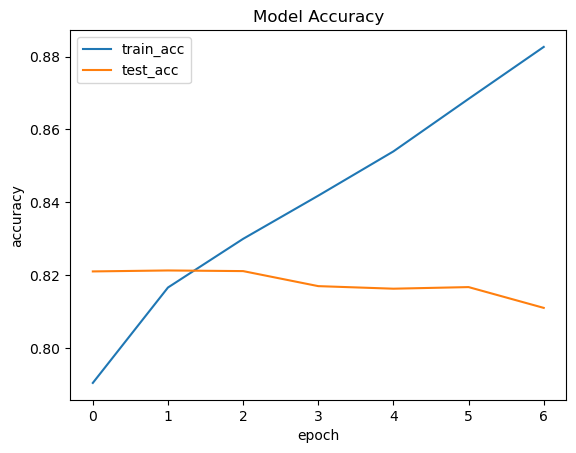

In [285]:
#plt.figure(figsize = (12,12))
#plt.subplot(2,1,1)
plt.plot(hist2.history['accuracy'], label="train_acc")
plt.plot(hist2.history['val_accuracy'], label = "test_acc")
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [286]:
from tensorflow.keras.applications import ResNet50V2

base_mod3 = ResNet50V2(weights = 'imagenet', include_top = False, input_shape=(75, 75,3))
base_mod3.trainable = False

# add custom top layers
x = base_mod3.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(5000, activation = "relu")(x)
x = Dense(5000, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(3000, activation = "relu")(x)

predictions = Dense(2, activation = 'sigmoid')(x)
mod3 = Model(inputs = base_mod3.input, outputs = predictions)

# confirm unfrozen layers
for layer in mod3.layers:
    if layer.trainable == True:
        print(layer)

94668760/94668760 [==============================] - 10s 0us/step


In [287]:
el_stop = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1),
             ModelCheckpoint('mod3_75x75.hdf5', save_best_only = True)]
opt = adam_v2.Adam(learning_rate = 0.001)
mod3.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [288]:
%%time
hist3 = mod3.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 30, callbacks = el_stop)

Epoch 1/30
830/830 [==============================] - 555s 664ms/step - loss: 0.5465 - accuracy: 0.7831 - val_loss: 0.4454 - val_accuracy: 0.8128
Epoch 2/30
830/830 [==============================] - 545s 656ms/step - loss: 0.4197 - accuracy: 0.8183 - val_loss: 0.4439 - val_accuracy: 0.8089
Epoch 3/30
830/830 [==============================] - 545s 657ms/step - loss: 0.3905 - accuracy: 0.8334 - val_loss: 0.4417 - val_accuracy: 0.8199
Epoch 4/30
830/830 [==============================] - 535s 645ms/step - loss: 0.3633 - accuracy: 0.8471 - val_loss: 0.4276 - val_accuracy: 0.8222
Epoch 5/30
830/830 [==============================] - 529s 638ms/step - loss: 0.3347 - accuracy: 0.8570 - val_loss: 0.4403 - val_accuracy: 0.8160
Epoch 6/30
830/830 [==============================] - 530s 639ms/step - loss: 0.2984 - accuracy: 0.8746 - val_loss: 0.5045 - val_accuracy: 0.8151
Epoch 7/30
830/830 [==============================] - 528s 636ms/step - loss: 0.2630 - accuracy: 0.8900 - val_loss: 0.5296 -

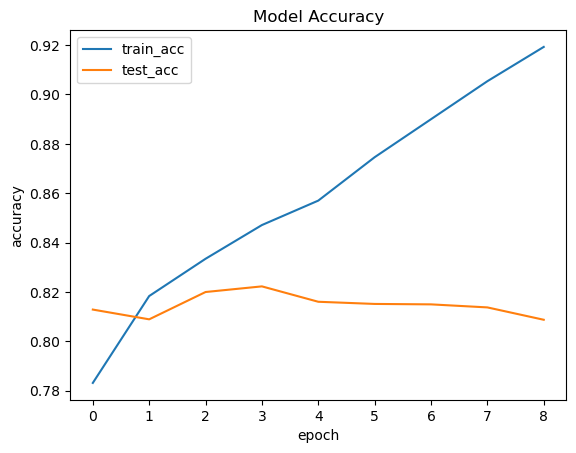

In [289]:
plt.plot(hist3.history['accuracy'], label="train_acc")
plt.plot(hist3.history['val_accuracy'], label = "test_acc")
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 50x50

In [151]:
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = VGG16(weights = 'imagenet', include_top = False, input_shape=(50, 50,3))
base_model.trainable = False

# add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(5000, activation = "relu")(x)
x = Dense(5000, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(3000, activation = "relu")(x)

predictions = Dense(2, activation = 'sigmoid')(x)
model = Model(inputs = base_model.input, outputs = predictions)

# confirm unfrozen layers
for layer in model.layers:
    if layer.trainable == True:
        print(layer)

In [152]:
from keras.optimizers import adam_v2
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1),
             ModelCheckpoint('model.hdf5', save_best_only = True)]
opt = adam_v2.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [153]:
model.summary()

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0  

In [155]:
%%time
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 30, callbacks = callbacks)

Epoch 1/30
830/830 [==============================] - 433s 521ms/step - loss: 0.4877 - accuracy: 0.7770 - val_loss: 0.4609 - val_accuracy: 0.7972
Epoch 2/30
830/830 [==============================] - 436s 526ms/step - loss: 0.4587 - accuracy: 0.7947 - val_loss: 0.4318 - val_accuracy: 0.8125
Epoch 3/30
830/830 [==============================] - 429s 517ms/step - loss: 0.4489 - accuracy: 0.7969 - val_loss: 0.4545 - val_accuracy: 0.8012
Epoch 4/30
830/830 [==============================] - 423s 509ms/step - loss: 0.4386 - accuracy: 0.8064 - val_loss: 0.4398 - val_accuracy: 0.8046
Epoch 5/30
830/830 [==============================] - 410s 494ms/step - loss: 0.4328 - accuracy: 0.8054 - val_loss: 0.4192 - val_accuracy: 0.8151
Epoch 6/30
830/830 [==============================] - 403s 486ms/step - loss: 0.4282 - accuracy: 0.8070 - val_loss: 0.4259 - val_accuracy: 0.8154
Epoch 7/30
830/830 [==============================] - 403s 485ms/step - loss: 0.4213 - accuracy: 0.8121 - val_loss: 0.4272 -

In [ ]:
#loss,accuracy = model.evaluate(x_test, y_test)

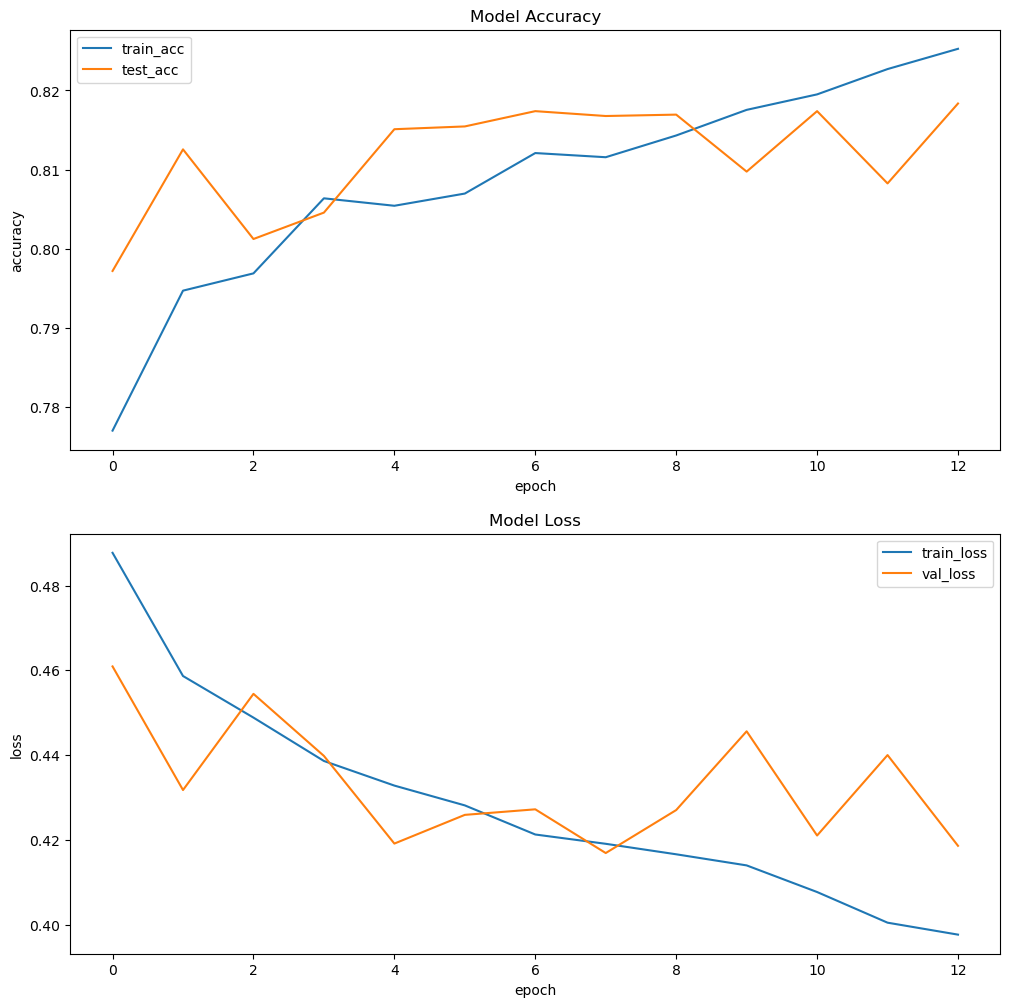

In [295]:
plt.figure(figsize = (12,12))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], label="train_acc")
plt.plot(history.history['val_accuracy'], label = "test_acc")
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = "train_loss")
plt.plot(history.history['val_loss'], label = "val_loss")
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [160]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [161]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(MaxPooling2D((2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.3))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.3))
model2.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dense(2, activation='softmax'))

In [290]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [162]:
model2.compile(Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [164]:
%%time
history2 = model2.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 30, batch_size = 35)

Epoch 1/30
759/759 [==============================] - 189s 249ms/step - loss: 0.4283 - accuracy: 0.8238 - val_loss: 0.5736 - val_accuracy: 0.7033
Epoch 2/30
759/759 [==============================] - 187s 247ms/step - loss: 0.3950 - accuracy: 0.8322 - val_loss: 0.5112 - val_accuracy: 0.7507
Epoch 3/30
759/759 [==============================] - 184s 242ms/step - loss: 0.3779 - accuracy: 0.8429 - val_loss: 0.4704 - val_accuracy: 0.8018
Epoch 4/30
759/759 [==============================] - 183s 241ms/step - loss: 0.3643 - accuracy: 0.8487 - val_loss: 0.4741 - val_accuracy: 0.7920
Epoch 5/30
759/759 [==============================] - 184s 242ms/step - loss: 0.3538 - accuracy: 0.8530 - val_loss: 0.7312 - val_accuracy: 0.6355
Epoch 6/30
759/759 [==============================] - 183s 241ms/step - loss: 0.3455 - accuracy: 0.8570 - val_loss: 0.6813 - val_accuracy: 0.6660
Epoch 7/30
759/759 [==============================] - 185s 244ms/step - loss: 0.3302 - accuracy: 0.8639 - val_loss: 0.4833 -

In [463]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       128       
 hNormalization)                                                 
                                                        

In [183]:
#import joblib as jbl
#jbl.dump(model2, 'model_seq.pkl')

In [184]:
#model2.save('model_seq.hdf5')

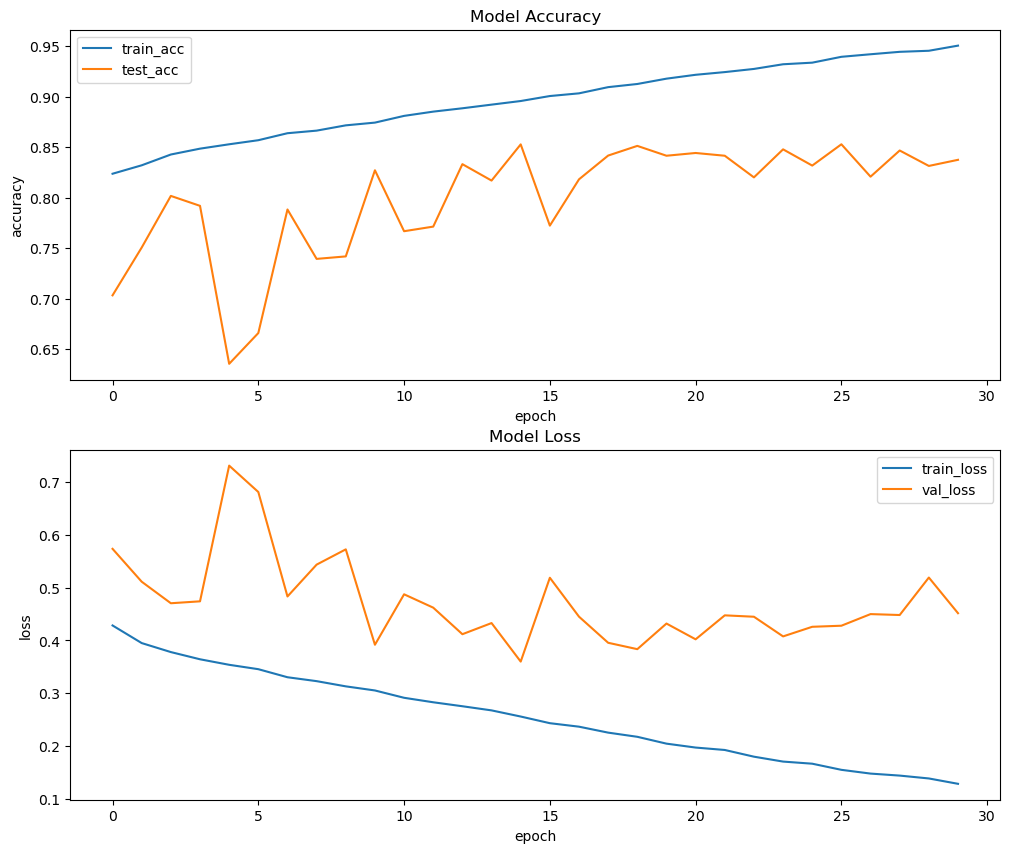

In [447]:
plt.figure(figsize = (12, 10))
plt.subplot(2,1,1)
plt.plot(history2.history['accuracy'], label="train_acc")
plt.plot(history2.history['val_accuracy'], label = "test_acc")
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(history2.history['loss'], label = "train_loss")
plt.plot(history2.history['val_loss'], label = "val_loss")
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

830/830 [==============================] - 38s 46ms/step


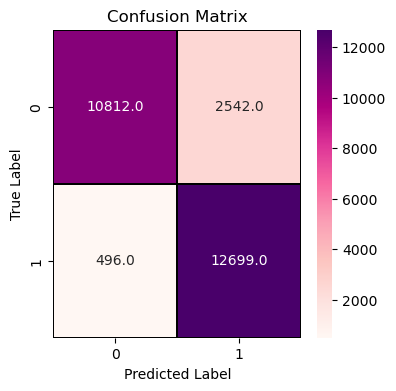

In [457]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model2.predict(x_train)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_train,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="RdPu",linecolor="black", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [458]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     13354
           1       0.83      0.96      0.89     13195

    accuracy                           0.89     26549
   macro avg       0.89      0.89      0.88     26549
weighted avg       0.90      0.89      0.88     26549



In [465]:
loss, accuracy= model2.evaluate(x_test, y_test)
print(f'Accuracy: {accuracy*100}')

356/356 [==============================] - 16s 44ms/step - loss: 0.3430 - accuracy: 0.8915
Accuracy: 89.1466736793518


In [360]:
from tensorflow.keras.applications import MobileNet

b_mod3 = MobileNet(weights = 'imagenet', include_top = False, input_shape=(75, 75,3))
b_mod3.trainable = False

# add custom top layers
x = b_mod3.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(4096, activation = "relu")(x)
x = Dense(4096, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(2096, activation = "relu")(x)

predictions = Dense(2, activation = 'sigmoid')(x)
model3 = Model(inputs = b_mod3.input, outputs = predictions)

# confirm unfrozen layers
for layer in model3.layers:
    if layer.trainable == True:
        print(layer)

In [361]:
eal_stop = [EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1),
             ModelCheckpoint('model3_50x50.hdf5', save_best_only = True)]
opt = adam_v2.Adam(learning_rate = 0.001)
model3.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [362]:
%%time
history3 = model3.fit(x_train, y_train, validation_data = (x_test, y_test), verbose = 1, epochs = 30, callbacks = eal_stop)

Epoch 1/30
830/830 [==============================] - 218s 261ms/step - loss: 0.5210 - accuracy: 0.7908 - val_loss: 0.4391 - val_accuracy: 0.8058
Epoch 2/30
830/830 [==============================] - 217s 261ms/step - loss: 0.4484 - accuracy: 0.8068 - val_loss: 0.4411 - val_accuracy: 0.8083
Epoch 3/30
830/830 [==============================] - 214s 258ms/step - loss: 0.4382 - accuracy: 0.8107 - val_loss: 0.4369 - val_accuracy: 0.8117
Epoch 4/30
830/830 [==============================] - 212s 256ms/step - loss: 0.4304 - accuracy: 0.8149 - val_loss: 0.4544 - val_accuracy: 0.8116
Epoch 5/30
830/830 [==============================] - 213s 257ms/step - loss: 0.4230 - accuracy: 0.8178 - val_loss: 0.4348 - val_accuracy: 0.8147
Epoch 6/30
830/830 [==============================] - 217s 261ms/step - loss: 0.4190 - accuracy: 0.8178 - val_loss: 0.4273 - val_accuracy: 0.8127
Epoch 7/30
830/830 [==============================] - 223s 269ms/step - loss: 0.4126 - accuracy: 0.8210 - val_loss: 0.4263 -

KeyboardInterrupt: 

In [65]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from keras.metrics import binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools

In [66]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 3)))
model_1.add(BatchNormalization())
model_1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.3))
model_1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Dropout(0.3))
model_1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_1.add(BatchNormalization())
model_1.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dropout(0.3))
model_1.add(Dense(24, activation='relu', kernel_initializer='he_uniform'))
model_1.add(Dense(2, activation='softmax'))

In [67]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 50, 50, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_25 (Bat  (None, 25, 25, 32)       128       
 chNormalization)                                                
                                                      

In [68]:
from keras.optimizers import adam_v2
early_stop = [EarlyStopping(monitor='val_loss', patience=10, verbose = 1), 
              ModelCheckpoint('model_seq3.hdf5', save_best_only = True)]
opt = adam_v2.Adam(learning_rate = 0.0001)
model_1.compile(loss='binary_crossentropy', optimizer = opt, metrics=['accuracy'])

In [74]:
%%time
history3 = model_1.fit(x_train, y_train, 
                      validation_data = (x_test, y_test), 
                      epochs = 40, 
                      verbose = 1, 
                      callbacks = early_stop)

Epoch 1/40
830/830 [==============================] - 116s 140ms/step - loss: 0.2316 - accuracy: 0.9081 - val_loss: 0.3628 - val_accuracy: 0.8647
Epoch 2/40
830/830 [==============================] - 117s 140ms/step - loss: 0.2215 - accuracy: 0.9115 - val_loss: 0.3644 - val_accuracy: 0.8643
Epoch 3/40
830/830 [==============================] - 118s 142ms/step - loss: 0.2153 - accuracy: 0.9149 - val_loss: 0.3552 - val_accuracy: 0.8741
Epoch 4/40
830/830 [==============================] - 117s 141ms/step - loss: 0.2021 - accuracy: 0.9197 - val_loss: 0.3380 - val_accuracy: 0.8730
Epoch 5/40
830/830 [==============================] - 116s 140ms/step - loss: 0.1936 - accuracy: 0.9238 - val_loss: 0.3755 - val_accuracy: 0.8561
Epoch 6/40
830/830 [==============================] - 117s 141ms/step - loss: 0.1873 - accuracy: 0.9268 - val_loss: 0.3684 - val_accuracy: 0.8599
Epoch 7/40
830/830 [==============================] - 118s 142ms/step - loss: 0.1839 - accuracy: 0.9299 - val_loss: 0.3594 -

In [46]:
#model_1.save('model_seq3.hdf5')

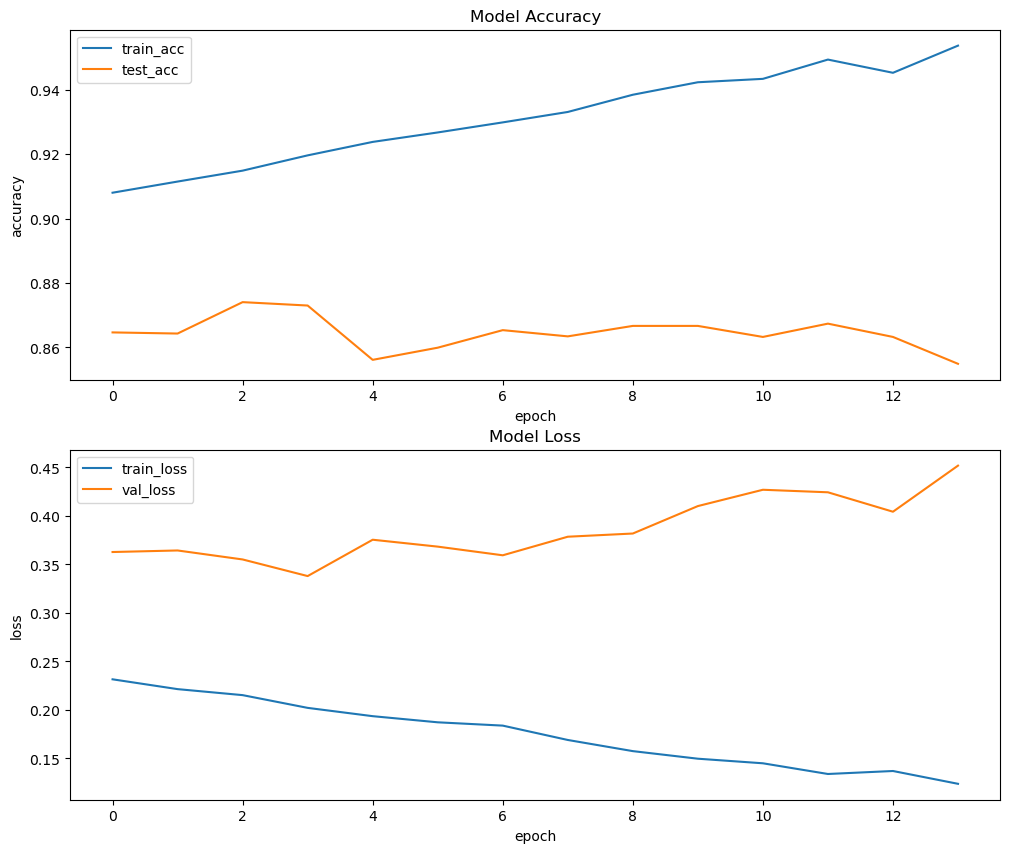

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 10))
plt.subplot(2,1,1)
plt.plot(history3.history['accuracy'], label="train_acc")
plt.plot(history3.history['val_accuracy'], label = "test_acc")
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.subplot(2,1,2)
plt.plot(history3.history['loss'], label = "train_loss")
plt.plot(history3.history['val_loss'], label = "val_loss")
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

830/830 [==============================] - 28s 34ms/step


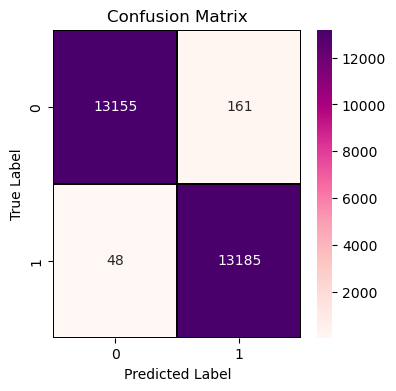

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

Y_pred = model3.predict(x_train)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_train,axis = 1) 

confusion_mtx1 = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusion_mtx1, annot=True, linewidths=0.01,cmap="RdPu",linecolor="black", fmt= '',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

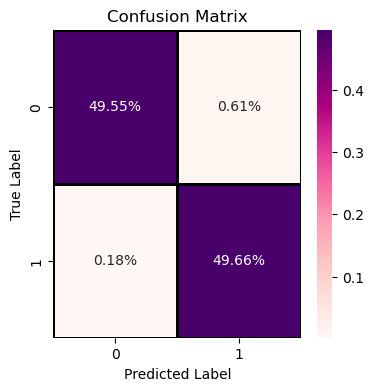

In [102]:
confusion_mt2 = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(confusion_mt2/np.sum(confusion_mt2), annot=True, linewidths=1,cmap="RdPu",linecolor="black", fmt= '.2%',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [101]:
from sklearn.metrics import classification_report
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     13316
           1       0.99      1.00      0.99     13233

    accuracy                           0.99     26549
   macro avg       0.99      0.99      0.99     26549
weighted avg       0.99      0.99      0.99     26549

